### BUSINESS UNDERSTANDING AND DATA UNDERSTANDING

##### Business overview

#### The objective was to build a classifier to determine if a customer would ‘soon’ leave SyriaTel, and to determine if there were predictable patterns.

##### 1.What features of the dataset are primary determinants of customer churn and to what extent?
##### 2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

##### 3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

___

#### Data understanding

##### importing necessary libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate,cross_val_predict

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
precision_recall_fscore_support, f1_score, plot_confusion_matrix





In [48]:
#The relative path to our dataset
path="C:\\Users\\HP\\Documents\\PROJECT 3\\bigml_59c28831336c6604c800002a (1).csv"

In [49]:
# Loading the dataset and getting the top 5
data= pd.read_csv(path)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [50]:
#information in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [51]:
#The shape of our data frame
data.shape

(3333, 21)

In [52]:
#describing our data
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [53]:
#a function to describe our columns
def describe_columns(self):
    print(self.columns)
    print(self.dtypes)
    print(self.shape)
    print(self.info())

    print(self.describe())
    
    
    

In [54]:
describe_columns(data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night 

### DATA PREPARATION

#### Explanatory Data Analysia

In [55]:
#to find the count of missing and duplicated values
def data_describe(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"Number of missing values :{missing_values}\nNumber of duplicated:{duplicated_values}")
data_describe(data)  

Number of missing values :0
Number of duplicated:0


* There are no missing values and duplicated values in the dataset.The data set is now clean and ready for analysis

In [56]:
# inspecting the values of the coumn in the dataset
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* It is interesting to see that there are only 3 area_codes. It might be worth investigating whether a particular area code has higher churn than another or if it would be safe to simply drop area code. Also, area code would actually be more of a categorical feature rather than an int feature so we will change this data type.
* Since churn  (target) is a binary feature, we will replace churn with a label (0 or 1).

* Phone number is customer number feature for the client and has no meningful essence o we can drop the column
* We can see that columns international_plan and voice_mail_plan are binary features with yes/no values - we might want to change these types later to booleans or 1/0's.
* All minutes, calls and charges columns have reasonable values and nothing stands out as unusual at this stage.
* All states look normal, as expected.




In [57]:
#ropping phone number and state columns
data.drop(["phone number","state"],axis=1,inplace=True)

####  Exploring the Target(Churn)

In [58]:
# Finding the values pf churn column
churn_explore = data["churn"].value_counts()
churn_explore

False    2850
True      483
Name: churn, dtype: int64

* True will mean the customer was churned while False will mean the customer was not churned

In [59]:
# lets replace True with 1 and False 0
data.churn.replace((True,False),(1,0),inplace=True)

In [60]:
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

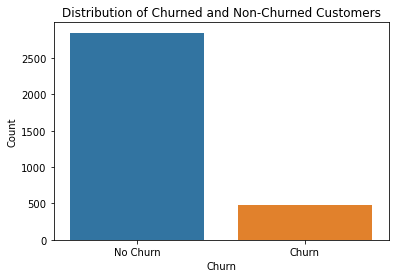

In [61]:

# Create a bar plot of churned vs. non-churned customers
sns.countplot(x="churn", data=data)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.title("Distribution of Churned and Non-Churned Customers")
plt.show()

exploring other features with churn

1. Area code

In [62]:
 # grouping area code and churn
grouped_data=data.groupby(["area code","churn"]).mean()


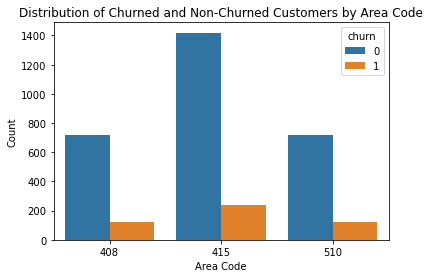

In [63]:
# Create a bar plot of churned vs. non-churned customers, grouped by area code
sns.countplot(x="area code", hue="churn", data=data)

# Add labels and titles to the plot
plt.xlabel("Area Code")
plt.ylabel("Count")
plt.title("Distribution of Churned and Non-Churned Customers by Area Code")

# Show the plot
plt.show()

* the plot suggests that there may be a relationship between customer location and churn rate, with area code 415 having a higher churn rate compared to the other area codes

2.Customer services

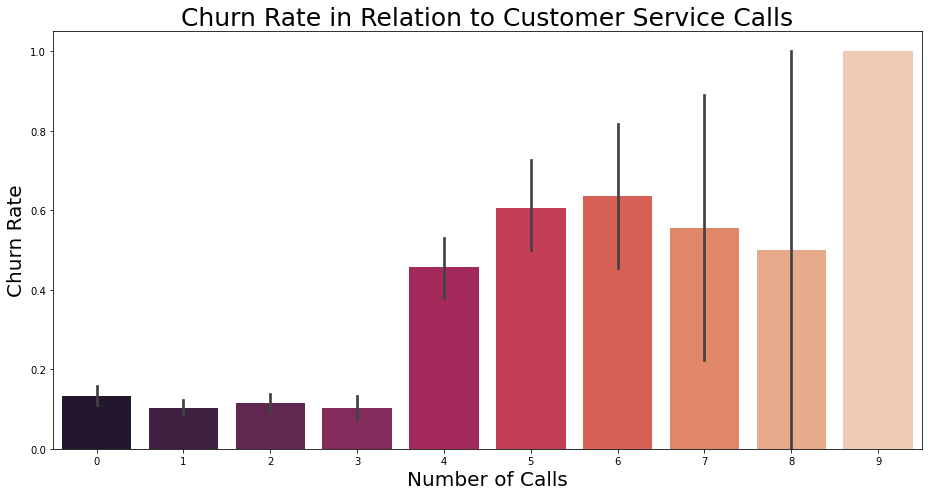

In [64]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data=data, x=data['customer service calls'], y='churn',palette="rocket", ax = ax)
plt.title('Churn Rate in Relation to Customer Service Calls', fontsize=25)
plt.ylabel('Churn Rate', fontsize=20)
plt.xlabel('Number of Calls', fontsize=20)
plt.tight_layout();

* it appears that there is a strong relationship between the number of times a customer calls customer service and their likelihood to churn. Specifically, the chart shows that when a customer has to call customer service four times, the likelihood of churn significantly increases

* By addressing customer issues in a timely and effective manner, businesses may be able to reduce customer churn and improve overall customer satisfaction.

3. international plan

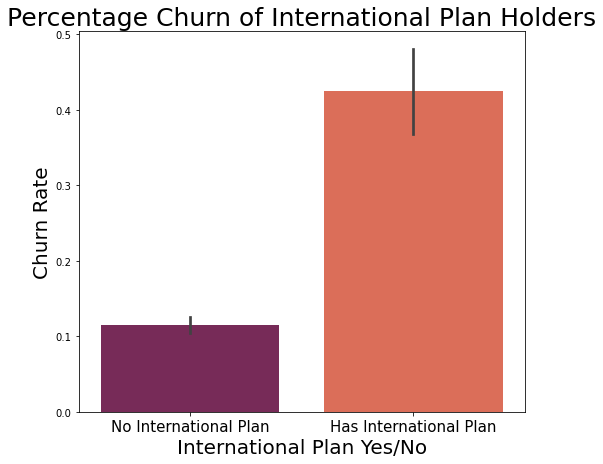

In [65]:
fig, ax = plt.subplots(figsize=(8,7))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="rocket", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout;

* Obervation:From the graph above majority of the customers holding international plan are churning because the services of SyriaTel are not fully satisfying them.
we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning.

### To check for outliers

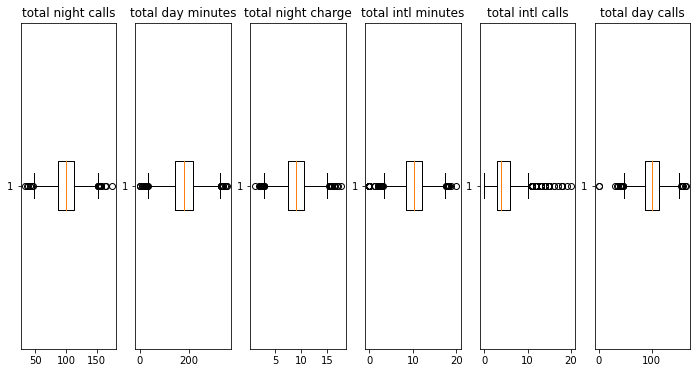

In [66]:

# Select the columns that contain numerical data
num_cols = ["total night calls", "total day minutes", "total night charge","total intl minutes","total intl calls","total day calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(data[col], vert=False)
    axes[i].set_title(col)

plt.show()

*  looking at outliers this indicate that some customers have significantly higher charges compared to the majority of customers. This could be due to factors such as premium services, overage charges, or other factors that increase the customer's bill.

In [67]:
#finding the correlation between churn and other features
data.corr().churn.sort_values(ascending=True)

voice mail plan          -0.102148
number vmail messages    -0.089728
total intl calls         -0.052844
total night calls         0.006141
area code                 0.006174
total eve calls           0.009233
account length            0.016541
total day calls           0.018459
total night minutes       0.035493
total night charge        0.035496
total intl minutes        0.068239
total intl charge         0.068259
total eve charge          0.092786
total eve minutes         0.092796
total day charge          0.205151
total day minutes         0.205151
customer service calls    0.208750
international plan        0.259852
churn                     1.000000
Name: churn, dtype: float64

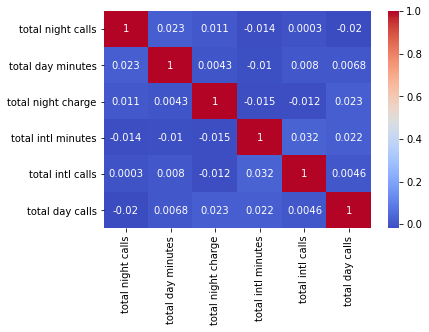

In [68]:
# a plot showing the correlation matrix 
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.show()

* You can see here that all *_minutes and *_charge features are perfectly correlated (r = 1). This is to be expected since charge is usually based on minutes. For this reason, we may not need to include both the charge and minutes columns, but rather choose just one. We might also choose to aggregate all the day/eve/night columns into one 'total' column. As mentioned earlier, for a first simple model, we will leave the features as is, but for later iterations we might choose to aggregate and drop these.

 

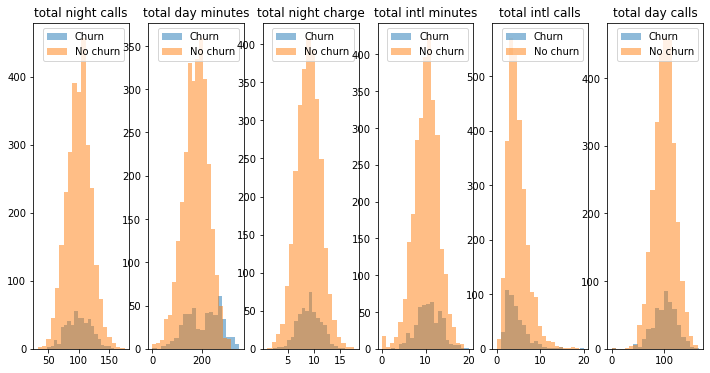

In [69]:
# Create a histogram for each numerical column, grouped by the churn status
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    data_churn = data[data["churn"] == 1][col]
    data_no_churn = data[data["churn"] == 0][col]
    axes[i].hist(data_churn, alpha=0.5, label="Churn", bins=20)
    axes[i].hist(data_no_churn, alpha=0.5, label="No churn", bins=20)
    axes[i].set_title(col)
    axes[i].legend()

plt.show()

* The histograms suggest that the "total day minutes", "total night charge", "total intl minutes", and "total intl calls" features may be strong predictors of churn, as there is a clear difference in their distributions between churned and non-churned customers. The "total night calls" and "total day calls" features may also be somewhat predictive of churn, although the differences in their distributions between the two groups are less pronounced.

####histogram for categorical

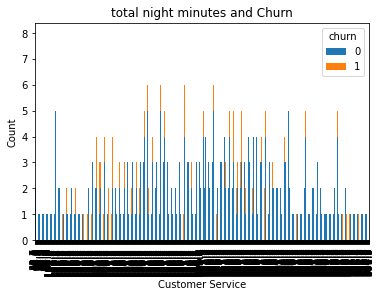

In [70]:
# Group data by customer service and churn
grouped = data.groupby(['total night minutes', 'churn']).size().unstack()

# Create stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Add title and axis labels
plt.title('total night minutes and Churn')
plt.xlabel('Customer Service')
plt.ylabel('Count')

# Display chart
plt.show()

### MODELING

* Baseline model

In [71]:

X=data.drop(["churn"],axis=1)
y=data["churn"]

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [80]:
# Logistic Regression
base_model = LogisticRegression(random_state=42)

base_model.fit(X_train_scaled, y_train)
y_base_pred = base_model.predict(X_test_scaled)





In [83]:
#calculate logistic regression score
lr_score = base_model.score(X_test_scaled, y_test)
lr_score



0.8575712143928036

In [84]:
#cross validation of the linear regression model
base_cv = cross_val_score(base_model, X_train_scaled, y_train)
base_cv





array([0.85580524, 0.86866792, 0.87054409, 0.84803002, 0.8630394 ])

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create confusion matrix display
ConfusionMatrixDisplay.from_estimator(base_model, X_train_scaled, y_train)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

In [91]:
!pip install --upgrade scikit-learn


Requirement already up-to-date: scikit-learn in c:\users\hp\anaconda3\envs\learn-env\lib\site-packages (1.2.2)


In [90]:
from sklearn.metrics import confusion_matrix

### RECOMENDATION